In [1]:
import cv2
from PIL import Image

In [2]:
image_name = "rdp_image.jpg"

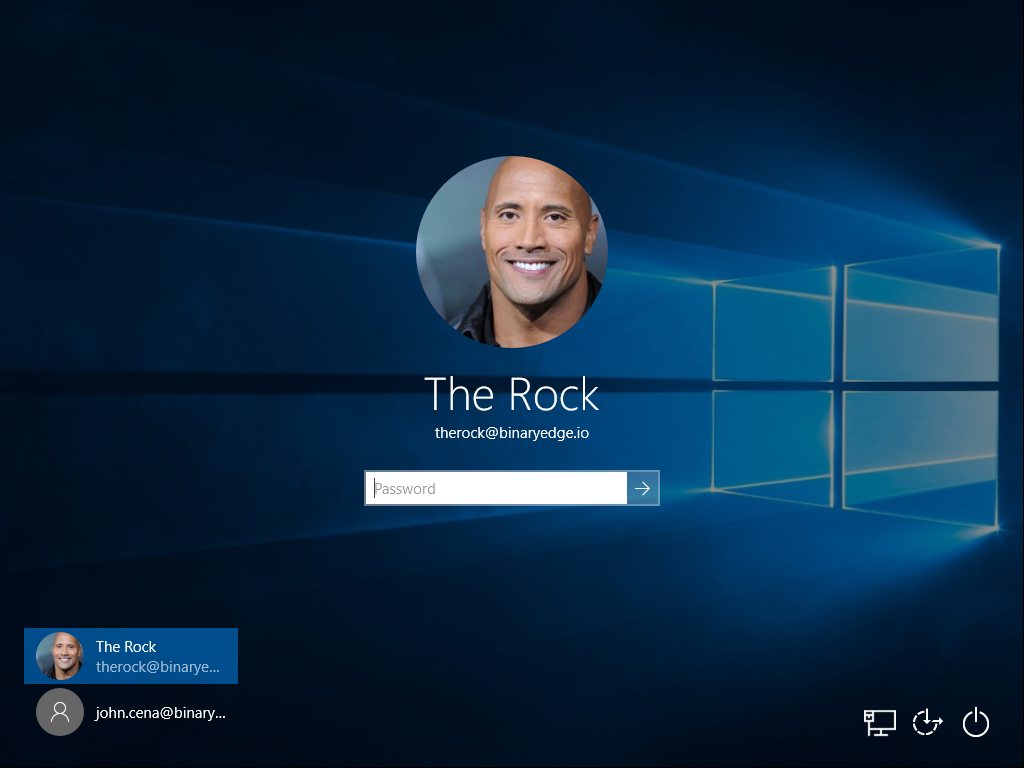

In [3]:
Image.open(image_name)

# Face Detection

## Viola-Jones Framework


http://docs.opencv.org/2.4/doc/tutorials/objdetect/cascade_classifier/cascade_classifier.html

Original Paper: "Rapid Object Detection using a Boosted Cascade of Simple Features"

https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf

In [4]:
def detect(path, scaleFactor):
    
    img = cv2.imread(path, 0)
    cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    rects = cascade.detectMultiScale(img, scaleFactor, 3, 2, (20,20))
    
    if len(rects) == 0:
        return [], img
    
    rects[:, 2:] += rects[:, :2]
    return rects, img

In [5]:
def box(rects, path):
    
    if list(rects):
        img = cv2.imread(path)
        for x1, y1, x2, y2 in rects:
            image_box = cv2.rectangle(img, (x1, y1), (x2, y2), (127, 255, 0), 2)
            image_cv = cv2.cvtColor(image_box, cv2.COLOR_BGR2RGB)
        return Image.fromarray(image_cv)
    else:
        return Image.open(path)

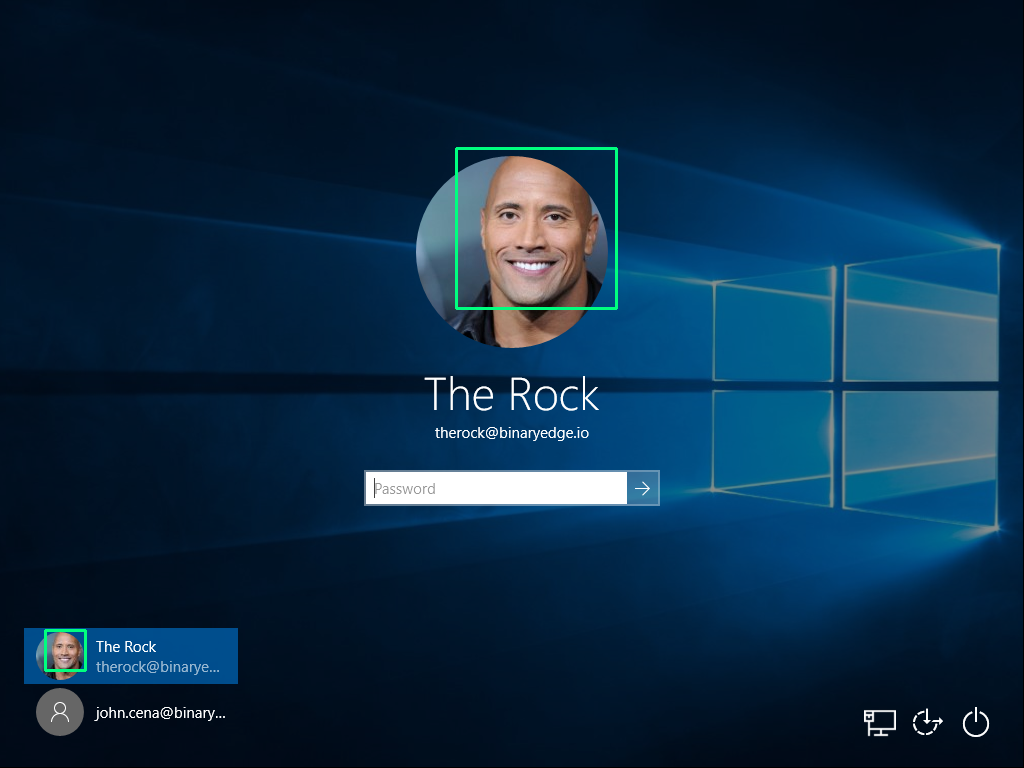

In [6]:
rects, img = detect(image_name, 2)
box(rects, image_name)

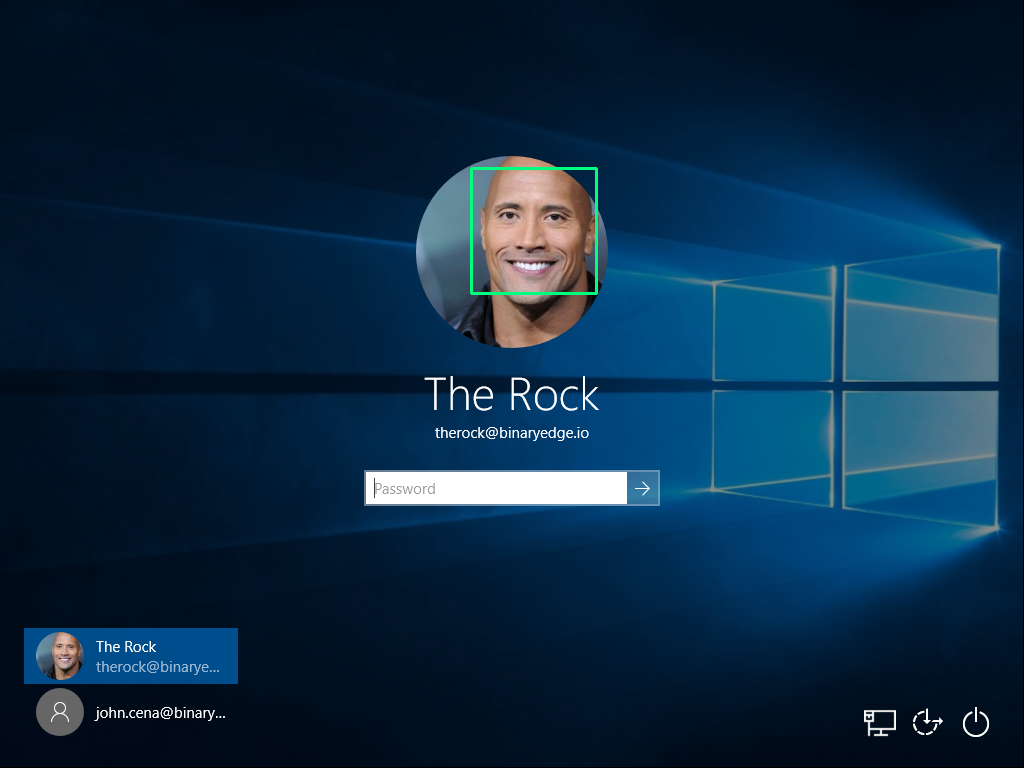

In [7]:
rects, img = detect(image_name, 2.5)
box(rects, image_name)

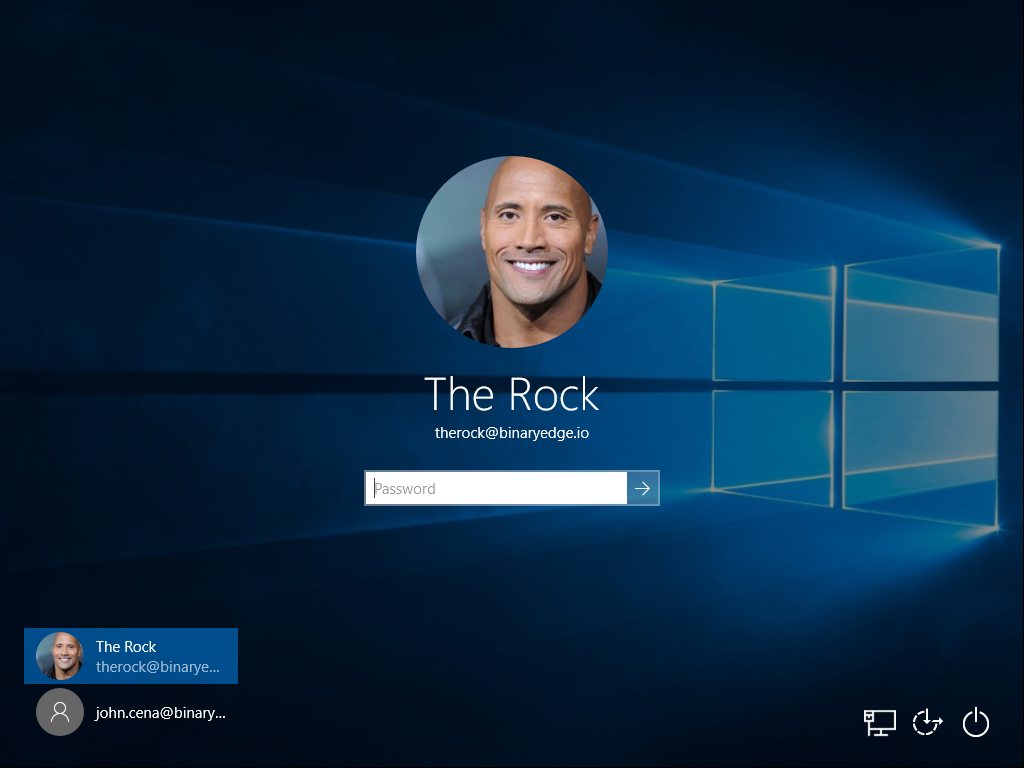

In [8]:
rects, img = detect(image_name, 3)
box(rects, image_name)

# Logo Detection

## Template Matching
http://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html

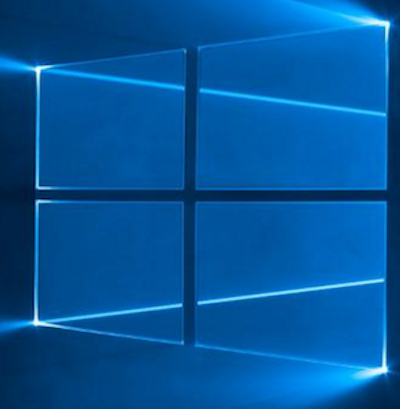

In [9]:
Image.open('windows10.jpg')

In [10]:
import imutils
import numpy as np

In [11]:
def find_logo(image_path, template_path):
    
    found = None

    for scale in np.linspace(1.0, 2.0, 5)[::-1]:
    
        gray = cv2.imread(image_path,0)
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        template = cv2.imread(template_path,0)
        (tH, tW) = template.shape[:2]
        r = gray.shape[1] / float(resized.shape[1])
 
        result = cv2.matchTemplate(resized, template, cv2.TM_CCOEFF_NORMED)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)

        else:
            (_, maxLoc, r) = found
            (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
            (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
     
    image = cv2.imread(image_path)
    image_rect = cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    image_cv = cv2.cvtColor(image_rect, cv2.COLOR_BGR2RGB)
    return Image.fromarray(image_cv)

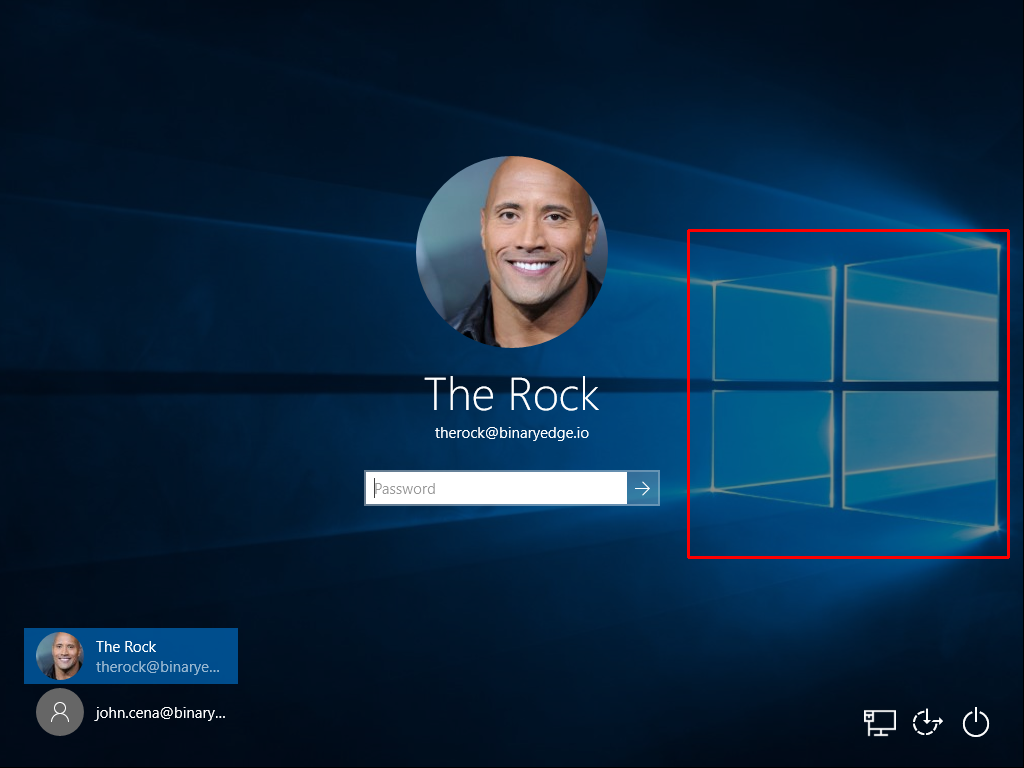

In [12]:
find_logo(image_name,'windows10.jpg')

# OCR

## pytesseract
https://pypi.python.org/pypi/pytesseract/0.1

In [13]:
from pytesseract import *

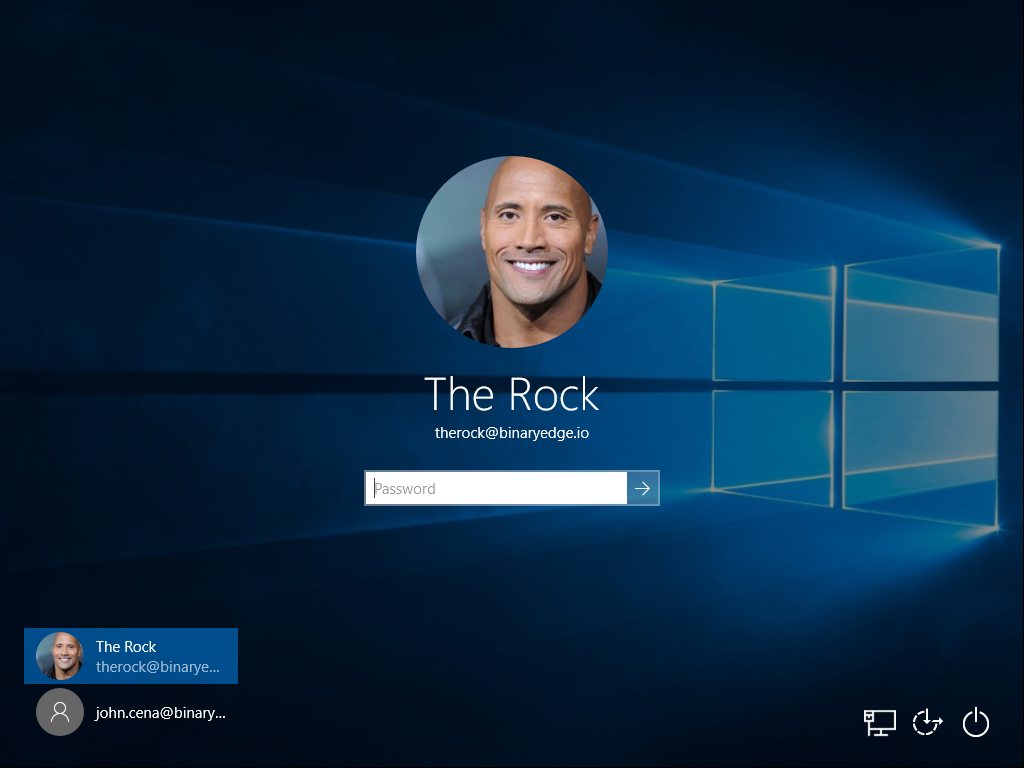

In [14]:
image = Image.open(image_name)
image

In [15]:
image_to_string((image))

'The Rdc\n\nmemckminzuyedgej\n\n. John.cena@hinavy... 1;] (:17. (I)'

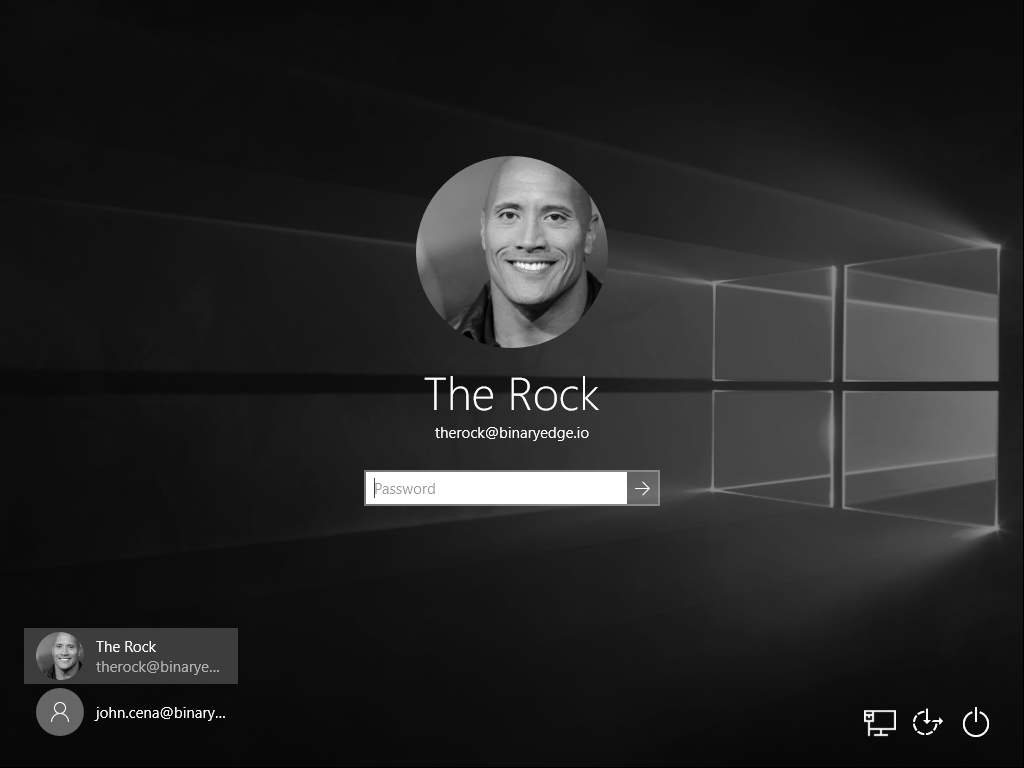

In [16]:
image = image.convert('L')
image

In [17]:
image_to_string((image))

'The Rock\n\nlhemck\xef\xac\x81lbinzlyedgejo\n\n \n\nThe Rack\nlherock\xef\xac\x81lblnalye...\n\n. John.cenz@hinary... El (17. (I)'

In [18]:
from be_ocr import image_ocr

In [19]:
image_ocr(image_name)

['i.,',
 'john.cena@binary...',
 'kl}.',
 'therock@binarye...',
 'ierockbinaryedgeio',
 'therock@binaryedge.io',
 'rock',
 'the']

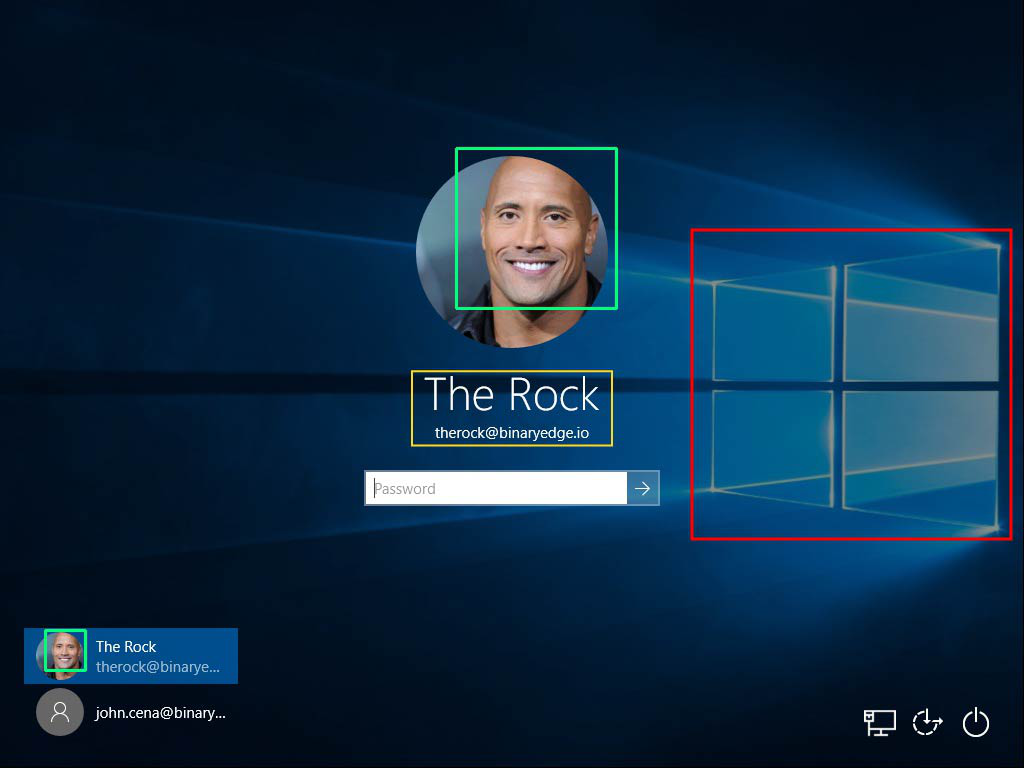

In [20]:
Image.open('rdp_image_detected_all.jpg')